In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# set up path to import my python scripts
import sys
import os
src_path = os.path.abspath(os.path.join('..'))
if src_path not in sys.path:
    sys.path.append(src_path+"/src")
    
%load_ext autoreload
%autoreload 2
import clean_df

#import data from 2013-2014 NHANES: https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey
#description of columns: https://wwwn.cdc.gov/nchs/nhanes/2013-2014/demo_h.htm
demo_df = pd.read_csv('../data/demographic.csv')
diet_df = pd.read_csv('../data/diet.csv')
exam_df = pd.read_csv('../data/examination.csv')
labs_df = pd.read_csv('../data/labs.csv')
med_df = pd.read_csv('../data/medications.csv', encoding='latin1')
ques_df = pd.read_csv('../data/questionnaire.csv')

### Step 1: EDA

In [3]:
new_demo_df = demo_df[['SEQN','RIAGENDR','RIDAGEYR','RIDRETH3',
'DMQMILIZ','DMQADFC','DMDBORN4','DMDMARTL']]

In [4]:
'''
demo_df feature descriptions:
------------------------------
SEQN: Participant sequence number
RIAGENDR: Particpant gender
	1 -> Male
	2 -> Female
RIDAGEYR: Age in years
RIDRETH3: Race/Hispanic origin w/ NH Asian
	1 -> Mexican American
	2 -> Other Hispanic
	3 -> Non-Hispanic White
	4 -> Non-Hispanic Black
	6 -> Non-Hispanic Asian
	7 -> Other Race - Including Multi-Racial
DMQMILIZ: Served active duty in US Armed Forces
	1 -> Yes
	2 -> No
	7 -> Refused
	9 -> Don't Know
	. -> Missing
DMQADFC: Served in a foreign country
	1 -> Yes
	2 -> No
	7 -> Refused
	9 -> Don't Know
	. -> Missing
DMDBORN4: Country of birth
	1 -> Born in US
	2 -> Others
	77 -> Refused
	99 -> Don't Know
	. -> Missing
DMDMARTL: Marital Status
	1 -> Married
	2 -> Widowed
	3 -> Divorced
	4 -> Separated
	5 -> Never married
	6 -> Living with partner
	77 -> Refused
	99 -> Don't Know
	. -> Missing
'''

"\ndemo_df feature descriptions:\n------------------------------\nSEQN: Participant sequence number\nRIAGENDR: Particpant gender\n\t1 -> Male\n\t2 -> Female\nRIDAGEYR: Age in years\nRIDRETH3: Race/Hispanic origin w/ NH Asian\n\t1 -> Mexican American\n\t2 -> Other Hispanic\n\t3 -> Non-Hispanic White\n\t4 -> Non-Hispanic Black\n\t6 -> Non-Hispanic Asian\n\t7 -> Other Race - Including Multi-Racial\nDMQMILIZ: Served active duty in US Armed Forces\n\t1 -> Yes\n\t2 -> No\n\t7 -> Refused\n\t9 -> Don't Know\n\t. -> Missing\nDMQADFC: Served in a foreign country\n\t1 -> Yes\n\t2 -> No\n\t7 -> Refused\n\t9 -> Don't Know\n\t. -> Missing\nDMDBORN4: Country of birth\n\t1 -> Born in US\n\t2 -> Others\n\t77 -> Refused\n\t99 -> Don't Know\n\t. -> Missing\nDMDMARTL: Marital Status\n\t1 -> Married\n\t2 -> Widowed\n\t3 -> Divorced\n\t4 -> Separated\n\t5 -> Never married\n\t6 -> Living with partner\n\t77 -> Refused\n\t99 -> Don't Know\n\t. -> Missing\n"

In [5]:
diet_df

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,14146.781331,10520.302070,1,59.0,2.0,2.0,8.0,7.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
9809,83728,38750.761193,51815.103262,1,25.0,2.0,2.0,9.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83729,15272.505199,10401.781170,1,59.0,2.0,2.0,1.0,6.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
9811,83730,0.000000,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
new_df = clean_df.DemographicDF()

In [7]:
exam_df = clean_df.ExamDF()

In [8]:
new_df.left_merge(exam_df)
labs_df = clean_df.LabsDF()
new_df.left_merge(labs_df)

In [9]:
new_df.df.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMQMILIZ,DMQADFC,DMDBORN4,DMDMARTL,BPXSY1,BPXSY2,BPXSY3,BPXSY4,BPXDI1,BPXDI2,BPXDI3,BPXDI4,AVG SYS BP,AVG DIAS BP,LBXHCT,LBXTC
0,73557,Male,69,Non-Hispanic Black,Yes,Yes,Born in US,Separated,122.0,114.0,102.0,NaN,72.0,76.0,74.0,NaN,112.666667,74.000000,45.4,167.0
1,73558,Male,54,Non-Hispanic White,No,None,Born in US,Married,156.0,160.0,156.0,NaN,62.0,80.0,42.0,NaN,157.333333,61.333333,36.7,170.0
2,73559,Male,72,Non-Hispanic White,Yes,Yes,Born in US,Married,140.0,140.0,146.0,NaN,90.0,76.0,80.0,NaN,142.000000,82.000000,49.9,126.0
3,73560,Male,9,Non-Hispanic White,None,None,Born in US,None,108.0,102.0,104.0,NaN,38.0,34.0,38.0,NaN,104.666667,36.666667,37.8,168.0
4,73561,Female,73,Non-Hispanic White,No,None,Born in US,Married,136.0,134.0,142.0,NaN,86.0,88.0,86.0,NaN,137.333333,86.666667,43.8,201.0


In [10]:
test_df = new_df.df

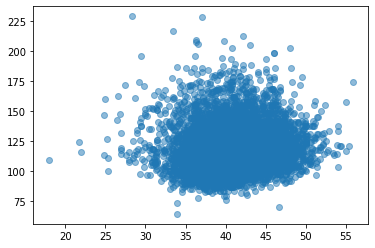

In [17]:
#AVG Systolic BP vs Nicotine (Hydroxycotinine, Serum (ng/mL))
fig, ax = plt.subplots()

x = test_df['LBXHCT']
y = test_df['AVG SYS BP']

ax = plt.scatter(x=x,y=y,alpha=0.5)

plt.show()

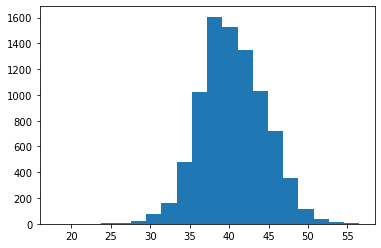

In [24]:
fig, ax = plt.subplots()

ax = plt.hist(x=x,bins=20)

In [25]:
x.describe()

count    8544.000000
mean       40.441959
std         4.106112
min        17.900000
25%        37.700000
50%        40.200000
75%        43.200000
max        56.500000
Name: LBXHCT, dtype: float64

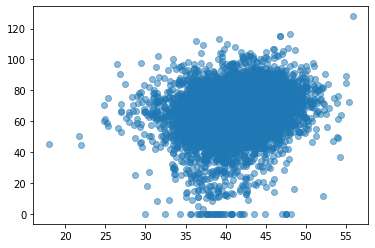

In [18]:
#AVG Diastolic BP vs Nicotine (Hydroxycotinine, Serum (ng/mL))
fig, ax = plt.subplots()

x = test_df['LBXHCT']
y = test_df['AVG DIAS BP']

ax = plt.scatter(x=x,y=y,alpha=0.5)

plt.show()

In [ ]:
new_demo_df['RIAGENDR'].apply(lambda x: 'Male' if x == 1 else 'Female')

0        Female
1        Female
2        Female
3        Female
4        Female
          ...  
10170    Female
10171    Female
10172    Female
10173    Female
10174    Female
Name: RIAGENDR, Length: 10175, dtype: object